In [4]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.extend(['C:\\Users\\troy\\Documents\\Code\\Libraries', 'C:\\Users\\troy\\Documents\\Excel Sheets', 'C:/Users/troy/Documents/Code/Libraries'])

from datetime import date, datetime
import os
import numpy as np
import pandas as pd
import collections
import plotly.express as px

from tia.bbg import LocalTerminal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Scratch for basic functions of the Live Vol Surface

In [12]:

from FinAPI import today_tz, convert_datelike_to_datetime
from dateutil.relativedelta import relativedelta

today = today_tz('USNY')
yest = today + relativedelta(days=1)
ticker = 'FVM2 Comdty'
static_fields = ['FUT_CNVS_FACTOR', 'FUT_TICK_SIZE', 'FUT_TICK_VAL', 'FUT_VAL_PT', 'LAST_TRADEABLE_DT', 'FUT_DLV_DT_FIRST', 'FUT_DLV_DT_LAST', 'FUT_FIRST_TRADE_DT']
time_series_flds = ['PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST', 'FUT_CTD_GROSS_BASIS', 'FUT_CTD_NET_BASIS', 'FUT_IMPLIED_REPO_RT', 'YLD_YTM_MID', 
                    'CONVENTIONAL_CTD_FORWARD_FRSK', 'FUT_EQV_CNVX_NOTL', 'OPEN_INT', 'PX_VOLUME']
snap_fields = ['PX_MID', "PX_VOLUME", 'OPEN_INT', 'FUT_CTD_GROSS_BASIS',
                   'FUT_CTD_NET_BASIS', 'FUT_IMPLIED_REPO_RT', 'YLD_YTM_MID', 'CONVENTIONAL_CTD_FORWARD_FRSK',
                   'FUT_EQV_CNVX_NOTL']
# fut_ts_df = LocalTerminal.get_historical(ticker, time_series_flds, history_start, history_end).as_map()[ticker]

In [34]:
# Static data
pd.Timestamp.today()

Timestamp('2022-03-30 12:02:51.861910')

In [33]:
# SNAP Live
LocalTerminal.get_reference_data(ticker, time_series_flds).as_map()[ticker]

# SNAP COB
LocalTerminal.get_historical(ticker, snap_fields, yest, yest).as_map()[ticker].iloc[0, :].to_dict()

{'PX_MID': 114.5859375,
 'PX_VOLUME': 91746.0,
 'OPEN_INT': nan,
 'FUT_CTD_GROSS_BASIS': nan,
 'FUT_CTD_NET_BASIS': nan,
 'FUT_IMPLIED_REPO_RT': nan,
 'YLD_YTM_MID': 2.851,
 'CONVENTIONAL_CTD_FORWARD_FRSK': 4.6295,
 'FUT_EQV_CNVX_NOTL': 0.2276}

In [11]:
# History
LocalTerminal.get_historical(ticker, time_series_flds, date(2022, 1, 1)).as_map()[ticker]

,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,FUT_CTD_GROSS_BASIS,FUT_CTD_NET_BASIS,FUT_IMPLIED_REPO_RT,YLD_YTM_MID,CONVENTIONAL_CTD_FORWARD_FRSK,FUT_EQV_CNVX_NOTL,OPEN_INT,PX_VOLUME
date,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,120.437500,-2.2507,-12.9939,0.89955,1.717,4.8982,0.2313,NaN,NaN
2022-01-04,NaN,NaN,NaN,120.429688,-2.5486,-13.4530,0.91934,1.718,4.8978,0.2313,NaN,NaN
2022-01-05,NaN,NaN,NaN,120.117188,-2.7095,-13.3217,0.93293,1.777,4.8834,0.2311,NaN,NaN
2022-01-06,NaN,NaN,NaN,119.867188,-2.9884,-13.7763,0.95386,1.824,4.8719,0.2309,NaN,NaN
2022-01-07,NaN,NaN,NaN,119.734375,-3.3010,-13.7253,0.97866,1.850,4.8658,0.2309,NaN,NaN
2022-01-10,NaN,NaN,NaN,119.562500,-3.8514,-14.1726,1.01784,1.882,4.8579,0.2307,NaN,NaN
2022-01-11,NaN,NaN,NaN,119.703125,-3.4908,-13.8864,0.99395,1.856,4.8644,0.2308,NaN,NaN
2022-01-12,NaN,NaN,NaN,119.679688,-0.8851,-11.4444,0.82052,1.860,4.8633,0.2308,NaN,NaN
2022-01-13,NaN,NaN,NaN,119.726562,-0.3490,-10.7123,0.78434,1.851,4.8655,0.2308,NaN,NaN


In [19]:
# INtraday bars
from dateutil.relativedelta import relativedelta
end = pd.Timestamp.now()
start = end + relativedelta(hours=-24*7)
LocalTerminal.get_intraday_bar(ticker, event='TRADE', start=start, end=end, interval=5).as_frame()

,time,open,high,low,close,volume,numEvents,value
0,2022-03-23 05:31:00,114.750000,114.750000,114.750000,114.750000,56,18,6426.000000
1,2022-03-23 05:36:00,114.757812,114.781250,114.757812,114.773438,934,88,107193.703125
2,2022-03-23 05:41:00,114.773438,114.773438,114.757812,114.765625,429,40,49235.132812
3,2022-03-23 05:46:00,114.765625,114.789062,114.765625,114.789062,391,70,44879.179688
4,2022-03-23 05:51:00,114.781250,114.796875,114.773438,114.796875,726,98,83335.585938
...,...,...,...,...,...,...,...,...
1285,2022-03-29 20:35:00,114.289062,114.289062,114.273438,114.273438,1853,88,211762.218750
1286,2022-03-29 20:40:00,114.273438,114.289062,114.273438,114.289062,1256,108,143535.625000
1287,2022-03-29 20:45:00,114.289062,114.289062,114.265625,114.281250,2317,145,264788.343750
1288,2022-03-29 20:50:00,114.281250,114.296875,114.273438,114.281250,2982,156,340789.125000


## Object Methods

In [2]:
from FinAPI.BondFutureOption.NXFreeBondFutVolSurf import StaticData, FuturesData, NxFreeBondOptSurfaceData

today = date(2022, 4, 14)
yest = date(2022, 4, 13)
future_code = "FVM2"

objSurf = NxFreeBondOptSurfaceData("FVM2", today)

[2022-04-16 03:27:57,194] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1792 TID:8644] Initialization Parameters: FVM2, 2022-04-14, 50
[2022-04-16 03:27:59,339] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1792 TID:8644] Futures Object loaded sucessfully - Futures Code: FVM2
[2022-04-16 03:27:59,340] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1792 TID:8644] Data Date: 2022-04-14
[2022-04-16 03:27:59,340] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1792 TID:8644] Price Mode: COB
[2022-04-16 03:27:59,341] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1792 TID:8644] Price Field: PX_SETTLE
[2022-04-16 03:28:00,422] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1792 TID:8644] Fut Price Ref: 113.3203125
[2022-04-16 03:28:00,422] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [_retrive_valid_tickers_from_bbg][696] [PID:1792 TID:8644] 
[2022-04-16 

In [3]:
objSurf.FutureCodes.snap(today)
objFut = objSurf.FutureCodes

price_target1 = 114.5
yield_target1 = 2.63831

price_target2 = 115
yield_target2 = 2.53049

price_target3 = 114.25
yield_target3 = 2.69242

price_target4 = 115.25
yield_target4 = 2.47678

objFut.debug_print()

print('----- Price / Yield Relationship ----')
print("1st target" , price_target1, yield_target1, objFut.approx_price_to_yield(price_target1), objFut.approx_yield_to_price(yield_target1))
print("2nd target" , price_target2, yield_target2, objFut.approx_price_to_yield(price_target2), objFut.approx_yield_to_price(yield_target2))
print("3rd target" , price_target3, yield_target3, objFut.approx_price_to_yield(price_target3), objFut.approx_yield_to_price(yield_target3))
print("4th target" , price_target4, yield_target4, objFut.approx_price_to_yield(price_target4), objFut.approx_yield_to_price(yield_target4))


----- Raw SNAP ------
{'PX_OPEN': 114.4921875, 'PX_HIGH': 114.5078125, 'PX_LOW': 113.84375, 'PX_LAST': 114.0234375, 'PX_VOLUME': 1314357.0, 'PX_MID': 113.9453125, 'OPEN_INT': 3756837.0, 'FUT_CTD_GROSS_BASIS': 2.2772, 'FUT_CTD_NET_BASIS': -1.4819, 'FUT_IMPLIED_REPO_RT': 0.49605, 'CTD_FORWARD_YTM_LAST': 2.742, 'CONVENTIONAL_CTD_FORWARD_FRSK': 4.6042, 'FUT_EQV_CNVX_NOTL': 0.2273}
------- Indiv Properties ------
114.0234375 4.6042 0.2273 2.742 0.49605 -1.4819 2.2772 3756837.0 1314357.0
----- Price / Yield Relationship ----
1st target 114.5 2.63831 2.6387570711487203 114.49962743349832
2nd target 115 2.53049 2.5309964557651523 114.9921923484522
3rd target 114.25 2.69242 2.6928518366586442 114.25143549084137
4th target 115.25 2.47678 2.477328353523495 115.23657512374352


In [4]:
objSurf.update_price_from_bbg()

[2022-04-12 21:51:05,897] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1660 TID:31508] Running Update ...
[2022-04-12 21:51:06,931] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1660 TID:31508]  - Futures Snapped ...
[2022-04-12 21:51:09,116] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1660 TID:31508]  - Option Data Snapped ...
[2022-04-12 21:51:09,123] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1660 TID:31508]  - Option Data Cleaned ...
[2022-04-12 21:51:11,163] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][626] [PID:1660 TID:31508]  - IR Data Snapped ...


<AxesSubplot:>

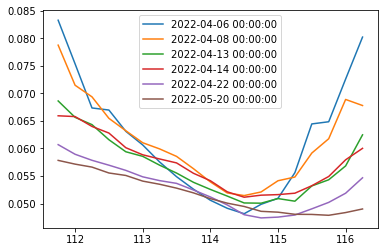

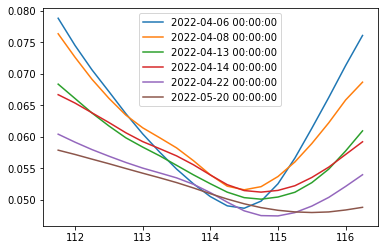

In [5]:
objSurf.MarketData.pricevol_lognormal.T.plot()
objSurf.MarketData.smooth_pricevol_lognormal.T.plot()

<AxesSubplot:>

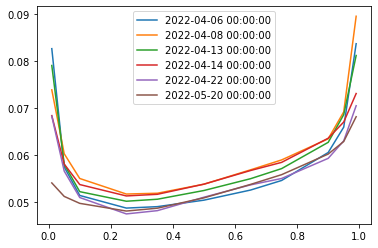

In [6]:
objSurf.get_skew_surface(typ="DELTA", vol_typ="RAW").T.plot()

In [8]:
objSurf.get_greek_surface(greek_name="GAMMA", typ="DELTA",opt_type="CALL")

,0.01,0.05,0.10,0.25,0.35,0.50,0.65,0.75,0.90,0.95,0.99
2022-04-06,0.024155,0.134618,0.256202,0.489638,0.567135,0.594011,0.528838,0.436686,0.217356,0.117230,0.023850
2022-04-08,0.022845,0.108434,0.202247,0.389773,0.452798,0.470169,0.412969,0.341567,0.175215,0.094422,0.018838
2022-04-13,0.016300,0.086054,0.162794,0.306806,0.354586,0.368315,0.326271,0.269345,0.135436,0.072722,0.015871
2022-04-14,0.018112,0.082588,0.151980,0.288266,0.333717,0.344933,0.303800,0.252878,0.128322,0.071519,0.016943
2022-04-22,0.014273,0.066690,0.126084,0.245160,0.281609,0.286241,0.252679,0.211404,0.108279,0.059856,0.013823
2022-05-20,0.011806,0.048261,0.084573,0.158381,0.182292,0.187810,0.165045,0.136313,0.069776,0.039254,0.009356


array([0])

## Surface Factory Methods

#### Methods Scratch

In [5]:
from FinAPI.BondFutureOption.NXFreeBondFutVolSurf import SurfaceFactory, NxFreeBondOptSurfaceData

objFactory = SurfaceFactory()
self = objFactory

# Initialization Function
data_dt = date(2022, 5, 19)
objFactory.initialize_surfaces(data_dt)


[2022-05-19 13:02:22,119] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][1535] [PID:32668 TID:32680] Loading for Future Code - TU
[2022-05-19 13:02:22,120] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [debug][1535] [PID:32668 TID:32680]  -- Future Codes: TUM2, TUU2
[2022-05-19 13:02:25,378] DEBUG [NxFreeBondFutOpt] [NXFreeBondFutVolSurf.py] [_retrive_valid_tickers_from_bbg][700] [PID:32668 TID:32680] 
C:\Users\troy\Documents\Code\Libraries\FinAPI\DataAnalysis\SplineSmoothing.py:614: RuntimeWarning: invalid value encountered in double_scalars
  gcv_val = (self.rss(lamda, cv=True) / (trP ** 2))
C:\Users\troy\Documents\Code\Libraries\FinAPI\BondFutureOption\SkewModel.py:677: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(total_imp_variance / self.day_count_fraction_)
C:\Users\troy\Documents\Code\Libraries\FinAPI\BondFutureOption\SkewModel.py:677: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(total_imp_variance / self.day_count_fra

##### Phase 1 -- Basic Metrics + Structure Pricing
---------------------------------------------------------------------------------------------
1. **Vol Term Structure**
   * ~~ATM Vol~~
   * ~~Same Strike Vol~~
   * ~~Same Moneyness Vol, moneyness to strike, then use strike vol~~
   * ~~Same log-moneyness vol, log_moneyness to strike, then use strike vol~~
   * ~~Same Delta Vol~~

2. **Skew Term Structure**
   * dsigma/dK[ATM]
   * sigma(25P) - sigma(25C),  ATM, abs strike, moneyness strike, log_moneyness strike
   * curv(25P) - curv(25C)

3. **Curvature Term Structure**
   * same variations as skew

4. **Digital Term Structure**
   * Same variations as the skew
   * 
5. **Sigma Surface**
   * ATM, Abs Strike, Log Moneyness, Moneyness, Delta

6. **dSigma/dK Surface**
   * ATM, Abs Strike, Log Moneyness, Moneyness, Delta
   
7. **Digital Surface**
   * ATM, Abs Strike, Log Moneyness, Moneyness, Delta

8. **Pricing of Bond Options / Structure and Analysis (Scenario, Vol shock etc), history from BBG direct**
   -> Individual

9. **Blotter with alert mechanism**

##### Phase 2-> structure scanner
----------------------------------------------------------------------------------------------

# Adapt the VIX structure scanner for the producing structure reports
# Combine with the knowledge of digitals etc.
# Physical districution / Time series vs. Structure

# ----------------------------------------------------------------------------------------------
# Pase 3 -> Realized volatility and macro range and scenario based structure analysis
# ----------------------------------------------------------------------------------------------
#   Realized vol vs. Implied Vol
#   Pricing of Jump risk
#   Macro range vs. Implied distribution
#   Probabilities of macro scenarios
#   Scenario Probablity RV
#   Chnage in future / skew for different re-pricing of the implied distribution
#   How does Vol-vol, skew and ATM get priced for different repricing of the distribution


# -----------------------------------------------------------------------------------------------
# Phase 3 -> Time Series of Skews and Vols
# -----------------------------------------------------------------------------------------------

* Time Series of the skews, vols
    -> 

 * Structure Scans

#### Static Data (For excel)

In [126]:
from FinAPI.BondFutureOption.NXFreeBondFutVolSurf import FuturesData
# Fut Static df
self = objFactory
self.get_fut_static_df()


,Last Delivery Date,First Delivery Date,CTD Conversion Factor,CTD ISIN,PX,CTD Coupon,CTD Maturity,CTD Accrual Date
TUM2,2022-07-06,2022-06-01,0.9385,US91282CEG24,105.625000,0.02250,2024-03-31,2022-03-31
TUU2,2022-10-05,2022-09-01,0.9303,US9128286Z85,105.226562,0.01750,2024-06-30,2019-06-30
FVM2,2022-07-06,2022-06-01,0.8089,US91282CCW91,113.218750,0.00750,2026-08-31,2021-08-31
FVU2,2022-10-05,2022-09-01,0.8271,US91282CDK45,112.812500,0.01250,2026-11-30,2021-11-30
TYM2,2022-06-30,2022-06-01,0.8205,US9128286B18,120.046875,0.02625,2029-02-15,2019-02-15
TYU2,2022-09-30,2022-09-01,0.8338,US91282CEM91,119.625000,0.02875,2029-04-30,2022-04-30
USM2,2022-06-30,2022-06-01,0.8375,US912810PW27,142.437500,0.04375,2038-02-15,2008-02-15
USU2,2022-09-30,2022-09-01,0.8390,US912810PW27,141.468750,0.04375,2038-02-15,2008-02-15


#### Term Structure Functions for Excel

<AxesSubplot:>

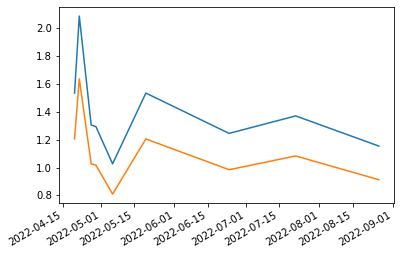

In [119]:
# ATM vol Term Structure
def get_atmvol_termstructure(self, base_ticker):
    atm_vol_df = None
    for fut_code, objSurf in self.objSurfaces[base_ticker].items():
        expiries = objSurf.MarketData.valid_xpiries.sort_index().index.values
        if atm_vol_df is not None:
            atm_vol_df = atm_vol_df.reindex(np.union1d(atm_vol_df.index, expiries))
        else:
            atm_vol_df = pd.DataFrame(index=expiries)
        atm_vol_df.loc[expiries, "FUT CODE"] = fut_code
        atm_vol_df.loc[expiries, "ATM STRIKE"] = objSurf.MarketData.ref_fut_price
        atm_vol_df.loc[expiries, "ATM VOL"] = [objSurf.get_smooth_interpolated_vol(pd.to_datetime(exp_dt), objSurf.MarketData.ref_fut_price) for exp_dt in expiries]
    return atm_vol_df

# Const Delta Vol Term Structure
def get_constdelta_voltermstruc(self, base_ticker, call_delta_val):
    call_delta = call_delta_val
    delta_vol_df = None
    for fut_code, objSurf in self.objSurfaces[base_ticker].items():
        expiries = objSurf.MarketData.valid_xpiries.sort_index().index.values
        if delta_vol_df is not None:
            delta_vol_df = delta_vol_df.reindex(np.union1d(delta_vol_df.index, expiries))
        else:
            delta_vol_df = pd.DataFrame(index=expiries)
        delta_vol_df.loc[expiries, "FUT CODE"] = fut_code
        delta_vol_df.loc[expiries, "DELTA"] = call_delta
        delta_vol_df.loc[expiries, "STRIKE"] = [objSurf.get_fwd_call_delta_strike(pd.to_datetime(exp_dt), call_delta) for exp_dt in expiries]
        delta_vol_df.loc[expiries, "STRIKE VOL"] = [objSurf.get_smooth_interpolated_vol(pd.to_datetime(exp_dt), delta_vol_df.loc[pd.to_datetime(exp_dt), "STRIKE"]) for exp_dt in expiries]
    return delta_vol_df  

# Constant Strike
def get_conststrike_voltermstruc(self, base_ticker, abs_strike):
    delta_vol_df = None
    for fut_code, objSurf in self.objSurfaces[base_ticker].items():
        expiries = objSurf.MarketData.valid_xpiries.sort_index().index.values
        if delta_vol_df is not None:
            delta_vol_df = delta_vol_df.reindex(np.union1d(delta_vol_df.index, expiries))
        else:
            delta_vol_df = pd.DataFrame(index=expiries)
        delta_vol_df.loc[expiries, "FUT CODE"] = fut_code
        delta_vol_df.loc[expiries, "ATM"] = objSurf.MarketData.ref_fut_price
        delta_vol_df.loc[expiries, "STRIKE VOL"] = [objSurf.get_smooth_interpolated_vol(pd.to_datetime(exp_dt),
                                                                                        abs_strike) for exp_dt in
                                                    expiries]
    return delta_vol_df

# Const Moneyness
def get_constmoneyness_voltermstruc(self, base_ticker, moneyness):
    delta_vol_df = None
    for fut_code, objSurf in self.objSurfaces[base_ticker].items():
        expiries = objSurf.MarketData.valid_xpiries.sort_index().index.values
        if delta_vol_df is not None:
            delta_vol_df = delta_vol_df.reindex(np.union1d(delta_vol_df.index, expiries))
        else:
            delta_vol_df = pd.DataFrame(index=expiries)
        delta_vol_df.loc[expiries, "FUT CODE"] = fut_code
        delta_vol_df.loc[expiries, "ATM"] = objSurf.MarketData.ref_fut_price
        delta_vol_df.loc[expiries, "STRIKE"] = objSurf.MarketData.ref_fut_price * moneyness
        delta_vol_df.loc[expiries, "STRIKE VOL"] = [objSurf.get_smooth_interpolated_vol(pd.to_datetime(exp_dt), 
                                                                                        delta_vol_df.loc[pd.to_datetime(exp_dt), "STRIKE"]) 
                                                    for exp_dt in expiries]
    return delta_vol_df

# Constant LogMOneyness
def get_constmoneyness_voltermstruc(self, base_ticker, log_moneyness):
    delta_vol_df = None
    for fut_code, objSurf in self.objSurfaces[base_ticker].items():
        expiries = objSurf.MarketData.valid_xpiries.sort_index().index.values
        if delta_vol_df is not None:
            delta_vol_df = delta_vol_df.reindex(np.union1d(delta_vol_df.index, expiries))
        else:
            delta_vol_df = pd.DataFrame(index=expiries)
        delta_vol_df.loc[expiries, "FUT CODE"] = fut_code
        delta_vol_df.loc[expiries, "ATM"] = objSurf.MarketData.ref_fut_price
        delta_vol_df.loc[expiries, "STRIKE"] = objSurf.MarketData.ref_fut_price * np.exp(log_moneyness)
        delta_vol_df.loc[expiries, "STRIKE VOL"] = [objSurf.get_smooth_interpolated_vol(pd.to_datetime(exp_dt), 
                                                                                        delta_vol_df.loc[pd.to_datetime(exp_dt), "STRIKE"]) 
                                                    for exp_dt in expiries]
    return delta_vol_df

self = objFactory
base_ticker = "US" 
call_delta = 0.95

atm_vol_df = get_atmvol_termstructure(self, base_ticker)
delta_vol_df = get_constdelta_voltermstruc(self, base_ticker, call_delta)
strike_vol_df = get_conststrike_voltermstruc(self, base_ticker, 114)
moneyness_vol_df = get_conststrike_voltermstruc(self, base_ticker, 1.05)
log_moneyness_vol_df = get_conststrike_voltermstruc(self, base_ticker, np.log(1.05))
log_moneyness_vol_df['STRIKE VOL'].plot()
moneyness_vol_df['STRIKE VOL'].plot()

#### Pricing Functions for Excel

In [168]:
# Delta skew, % skew
# dsigma_dK, d2sigma_dK2
# digital term structure
# 
exp_dt = "FVM2"
strikes = np.float64(139)
opt_type = "C"

self = objFactory.objSurfaces['FV'][exp_dt]
exp_dt = datetime(2022, 5, 20)
strikes = [strikes]

skew_mod = self.SURFACE_INTERPOLATOR.skew_dict[exp_dt]
skew_mod.price(strikes[0], "C")

1.2238367379708258e-20

In [181]:
# Pricing of Bond Options / Structure and Analysis (Scenario, Vol shock etc), history from BBG direct
self = objFactory

future_code = "TYM2"



objSurf = objFactory.objSurfaces[future_code[:2]][future_code]
expiry_codes = objSurf.MarketData.valid_xpiries.exp_code
expiry_dates = objSurf.MarketData.valid_xpiries.index.values

# expiry_code_to_date(objSurf, "1MK2")
objSurf.MarketData.price_dataset

,115.25,115.50,115.75,116.00,116.25,116.50,116.75,117.00,117.25,117.50,...,120.25,120.50,120.75,121.00,121.25,121.50,121.75,122.00,122.25,122.50
2022-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015625,...,0.015625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-13,NaN,NaN,NaN,NaN,NaN,0.015625,0.015625,0.03125,0.046875,0.078125,...,0.046875,0.031250,0.03125,0.015625,0.015625,0.015625,0.015625,NaN,NaN,NaN
2022-05-18,NaN,0.015625,0.03125,0.031250,0.03125,0.046875,0.062500,0.09375,0.109375,0.156250,...,0.109375,0.078125,0.06250,0.046875,0.046875,0.031250,0.031250,0.015625,0.015625,0.015625
2022-05-20,0.015625,0.015625,0.03125,0.046875,0.06250,0.078125,0.093750,0.12500,0.156250,0.203125,...,0.156250,0.125000,0.09375,0.062500,0.046875,0.046875,0.046875,0.031250,0.031250,0.031250


##### Object Method Testing